In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 204 GB / percent used: 18.9 %


# Check model data

In [13]:
var = 'ua'
folder = 'ATM'
exp = 'clim-without-MVA9'

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Define variable
label, units, cmap, levels = u.get_var_infos(var)

# Define paths
title_1 = 'clim-def'
root_1 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim'
path_1 = root_1+'/clim-relief-def-NMC/'+folder+'/Analyse/TS_MO'

title_2 = 'clim-without-MVA9'
root_2 = '/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR_v6.1.11_without_elevation_average/PROD/clim'
path_2 = root_2+'/clim-relief-def/'+folder+'/Analyse/TS_MO'

In [4]:
path_1

'/data/mlalande/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/PROD/clim/clim-relief-def-NMC/ATM/Analyse/TS_MO'

## Define period

In [5]:
xr.open_mfdataset(path_1+'/*'+var+'.nc', combine='by_coords').time_counter.coords

Coordinates:
    time_centered  (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1989-12-16 00:00:00

In [6]:
xr.open_mfdataset(path_2+'/*'+var+'.nc', combine='by_coords').time_counter.coords

Coordinates:
    time_centered  (time_counter) object dask.array<chunksize=(120,), meta=np.ndarray>
  * time_counter   (time_counter) object 1980-01-16 00:00:00 ... 1989-12-16 00:00:00

In [7]:
# Here the time doesn't make so much sense because the simulation are clim
period = slice('1980','1989')

## Load climatologies

In [8]:
model_1_clim = xr.open_mfdataset(path_1+'/*'+var+'.nc', combine='by_coords')[var].mean('time_counter', skipna=False)
model_1_clim.load()

<xarray.DataArray 'ua' (plev: 17, lat: 143, lon: 144)>
array([[[ 0.2349814 ,  0.2349814 ,  0.2349814 , ...,  0.2349814 ,
          0.2349814 ,  0.2349814 ],
        [ 0.6797028 ,  0.67429954,  0.66846406, ...,  0.6874062 ,
          0.686123  ,  0.6853702 ],
        [ 0.7964702 ,  0.79751366,  0.79766643, ...,  0.78444517,
          0.7925313 ,  0.79132026],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.10793436,  0.10793436,  0.10793436, ...,  0.10793436,
          0.10793436,  0.10793436],
        [ 0.3575173 ,  0.3578536 ,  0.35542685, ...,  0.34971792,
          0.3539114 ,  0.35639027],
        [ 0.6155109 ,  0.6196154 ,  0.62065464, ...,  0.59704864,
          0.6039131 ,  0.6096724 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.19001238,  0.19001238,  0.19001238, ...,  0.19001238,
          0.19001238,  0.19001238],
        [ 0.29205808,  0.28916195,  0.28332275, ...,  0.29414254,
          0.29343498,  0.29314178],
        [ 0.6643022 ,  0.6672944 ,  0.6650114 , ...,  0.64967084,
          0.65504605,  0.65904504],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[-1.6788572 , -1.6788572 , -1.6788572 , ..., -1.6788572 ,
         -1.6788572 , -1.6788572 ],
        [ 6.484668  ,  6.5591593 ,  6.6197352 , ...,  6.179754  ,
          6.2947054 ,  6.396476  ],
        [ 7.340939  ,  7.423596  ,  7.489122  , ...,  6.9940424 ,
          7.1258297 ,  7.2415576 ],
        ...,
        [ 5.4232283 ,  5.4871645 ,  5.544693  , ...,  5.193939  ,
          5.276352  ,  5.3528285 ],
        [ 4.2235847 ,  4.2849207 ,  4.3404717 , ...,  4.0069823 ,
          4.084376  ,  4.1566906 ],
        [ 1.3799465 ,  1.3799465 ,  1.3799465 , ...,  1.3799465 ,
          1.3799465 ,  1.3799465 ]],

       [[-1.7542892 , -1.7542892 , -1.7542892 , ..., -1.7542892 ,
         -1.7542892 , -1.7542892 ],
        [ 8.186518  ,  8.260215  ,  8.316639  , ...,  7.864065  ,
          7.9882307 ,  8.09583   ],
        [ 9.082015  ,  9.161343  ,  9.219989  , ...,  8.72372   ,
          8.8629055 ,  8.982416  ],
        ...,
        [ 6.506913  ,  6.5471005 ,  6.579312  , ...,  6.337588  ,
          6.402152  ,  6.4586186 ],
        [ 5.130677  ,  5.169535  ,  5.201148  , ...,  4.972089  ,
          5.031767  ,  5.084617  ],
        [ 0.9189445 ,  0.9189445 ,  0.9189445 , ...,  0.9189445 ,
          0.9189445 ,  0.9189445 ]],

       [[-1.2993735 , -1.2993735 , -1.2993735 , ..., -1.2993735 ,
         -1.2993735 , -1.2993735 ],
        [10.451001  , 10.496109  , 10.519857  , ..., 10.188328  ,
         10.297027  , 10.384644  ],
        [11.379452  , 11.423104  , 11.441901  , ..., 11.101548  ,
         11.218497  , 11.311171  ],
        ...,
        [ 7.6187587 ,  7.6127167 ,  7.597325  , ...,  7.574588  ,
          7.600205  ,  7.6147547 ],
        [ 6.0597353 ,  6.0538645 ,  6.039573  , ...,  6.0248814 ,
          6.044864  ,  6.0562034 ],
        [-0.02333793, -0.02333793, -0.02333793, ..., -0.02333793,
         -0.02333793, -0.02333793]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172

In [9]:
model_2_clim = xr.open_mfdataset(path_2+'/*'+var+'.nc', combine='by_coords')[var].mean('time_counter', skipna=False)
model_2_clim.load()

<xarray.DataArray 'ua' (plev: 17, lat: 143, lon: 144)>
array([[[ 0.21608616,  0.21608616,  0.21608616, ...,  0.21608616,
          0.21608616,  0.21608616],
        [ 1.2926748 ,  1.2824146 ,  1.272602  , ...,  1.2974076 ,
          1.2967932 ,  1.2967093 ],
        [ 1.3967549 ,  1.3911116 ,  1.3821672 , ...,  1.3869629 ,
          1.3944281 ,  1.3936989 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.29608938,  0.29608938,  0.29608938, ...,  0.29608938,
          0.29608938,  0.29608938],
        [ 1.0429467 ,  1.030364  ,  1.0144132 , ...,  1.0661367 ,
          1.0608003 ,  1.0527246 ],
        [ 1.1849136 ,  1.1739019 ,  1.1596417 , ...,  1.1918992 ,
          1.1931891 ,  1.1908951 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.3227266 ,  0.3227266 ,  0.3227266 , ...,  0.3227266 ,
          0.3227266 ,  0.3227266 ],
        [ 0.98554343,  0.97477984,  0.95881665, ...,  1.0107071 ,
          1.0039738 ,  0.9947371 ],
        [ 1.1750131 ,  1.1634471 ,  1.1470282 , ...,  1.1902338 ,
          1.189962  ,  1.1837981 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[-1.6458454 , -1.6458454 , -1.6458454 , ..., -1.6458454 ,
         -1.6458454 , -1.6458454 ],
        [ 6.7978034 ,  6.8766394 ,  6.9403515 , ...,  6.474685  ,
          6.5967035 ,  6.7044935 ],
        [ 7.9331665 ,  8.025883  ,  8.099372  , ...,  7.544446  ,
          7.6920195 ,  7.8217406 ],
        ...,
        [ 4.639001  ,  4.7262406 ,  4.8086443 , ...,  4.3516793 ,
          4.4508886 ,  4.5467286 ],
        [ 3.5809658 ,  3.6628494 ,  3.7404091 , ...,  3.3117194 ,
          3.4051409 ,  3.494846  ],
        [ 1.7648879 ,  1.7648879 ,  1.7648879 , ...,  1.7648879 ,
          1.7648879 ,  1.7648879 ]],

       [[-1.852653  , -1.852653  , -1.852653  , ..., -1.852653  ,
         -1.852653  , -1.852653  ],
        [ 8.62491   ,  8.710475  ,  8.777326  , ...,  8.260235  ,
          8.399641  ,  8.521289  ],
        [ 9.836718  ,  9.93533   , 10.010906  , ...,  9.407267  ,
          9.572261  ,  9.715555  ],
        ...,
        [ 5.509097  ,  5.5795307 ,  5.6437244 , ...,  5.2620387 ,
          5.3494267 ,  5.4319787 ],
        [ 4.270637  ,  4.336392  ,  4.3968186 , ...,  4.0417943 ,
          4.1230626 ,  4.199103  ],
        [ 1.4282    ,  1.4282    ,  1.4282    , ...,  1.4282    ,
          1.4282    ,  1.4282    ]],

       [[-1.7050983 , -1.7050983 , -1.7050983 , ..., -1.7050983 ,
         -1.7050983 , -1.7050983 ],
        [10.8879175 , 10.961179  , 11.011655  , ..., 10.535525  ,
         10.675082  , 10.792602  ],
        [12.08198   , 12.163255  , 12.217687  , ..., 11.681065  ,
         11.840598  , 11.974348  ],
        ...,
        [ 6.515967  ,  6.5527277 ,  6.582632  , ...,  6.354975  ,
          6.4154897 ,  6.469888  ],
        [ 5.0378494 ,  5.0711074 ,  5.0984693 , ...,  4.8966107 ,
          4.9498363 ,  4.9960957 ],
        [ 0.750993  ,  0.750993  ,  0.750993  , ...,  0.750993  ,
          0.750993  ,  0.750993  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.73239 87.46479 ... -87.46479 -88.73239 -90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172

# Load min surface pressure for mask

In [10]:
var_ps = 'psol'

ps_model_1_min = xr.open_mfdataset(path_1+'/*'+var_ps+'.nc', combine='by_coords')[var_ps].min('time_counter')
ps_model_2_min = xr.open_mfdataset(path_2+'/*'+var_ps+'.nc', combine='by_coords')[var_ps].min('time_counter')

model_1_clim_masked = model_1_clim.where(model_1_clim.plev <= ps_model_1_min)
model_2_clim_masked = model_2_clim.where(model_2_clim.plev <= ps_model_2_min)

# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [11]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/u.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).u.sel(time=period)

obs_clim = u.clim(obs, calendar='gregorian')

# Pa
ps_obs_min = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_1_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_masked_v = obs_clim_regrid_masked.interp(level=(model_1_clim.plev.values/100), method='linear').load()

Create weight file: bilinear_241x480_143x144_peri.nc


# Plot differences

In [12]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# Not guided
bias_global.append( (model_1_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_1_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_1_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_1_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_1_clim_masked - obs_clim_regrid_masked_v.values).where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_1_clim_masked.where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Guided
bias_global.append( (model_2_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_2_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_2_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_2_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_2_clim_masked - obs_clim_regrid_masked_v.values).where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_2_clim_masked.where((model_1_clim_masked.lon < lonlim[0]) | (model_1_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

bias_HMA.append( bias_HMA[1] - bias_HMA[0] )
clim_HMA.append( clim_HMA[1] - clim_HMA[0] )

bias_global_without_HMA.append( bias_global_without_HMA[1] - bias_global_without_HMA[0] )
clim_global_without_HMA.append( clim_global_without_HMA[1] - clim_global_without_HMA[0] )


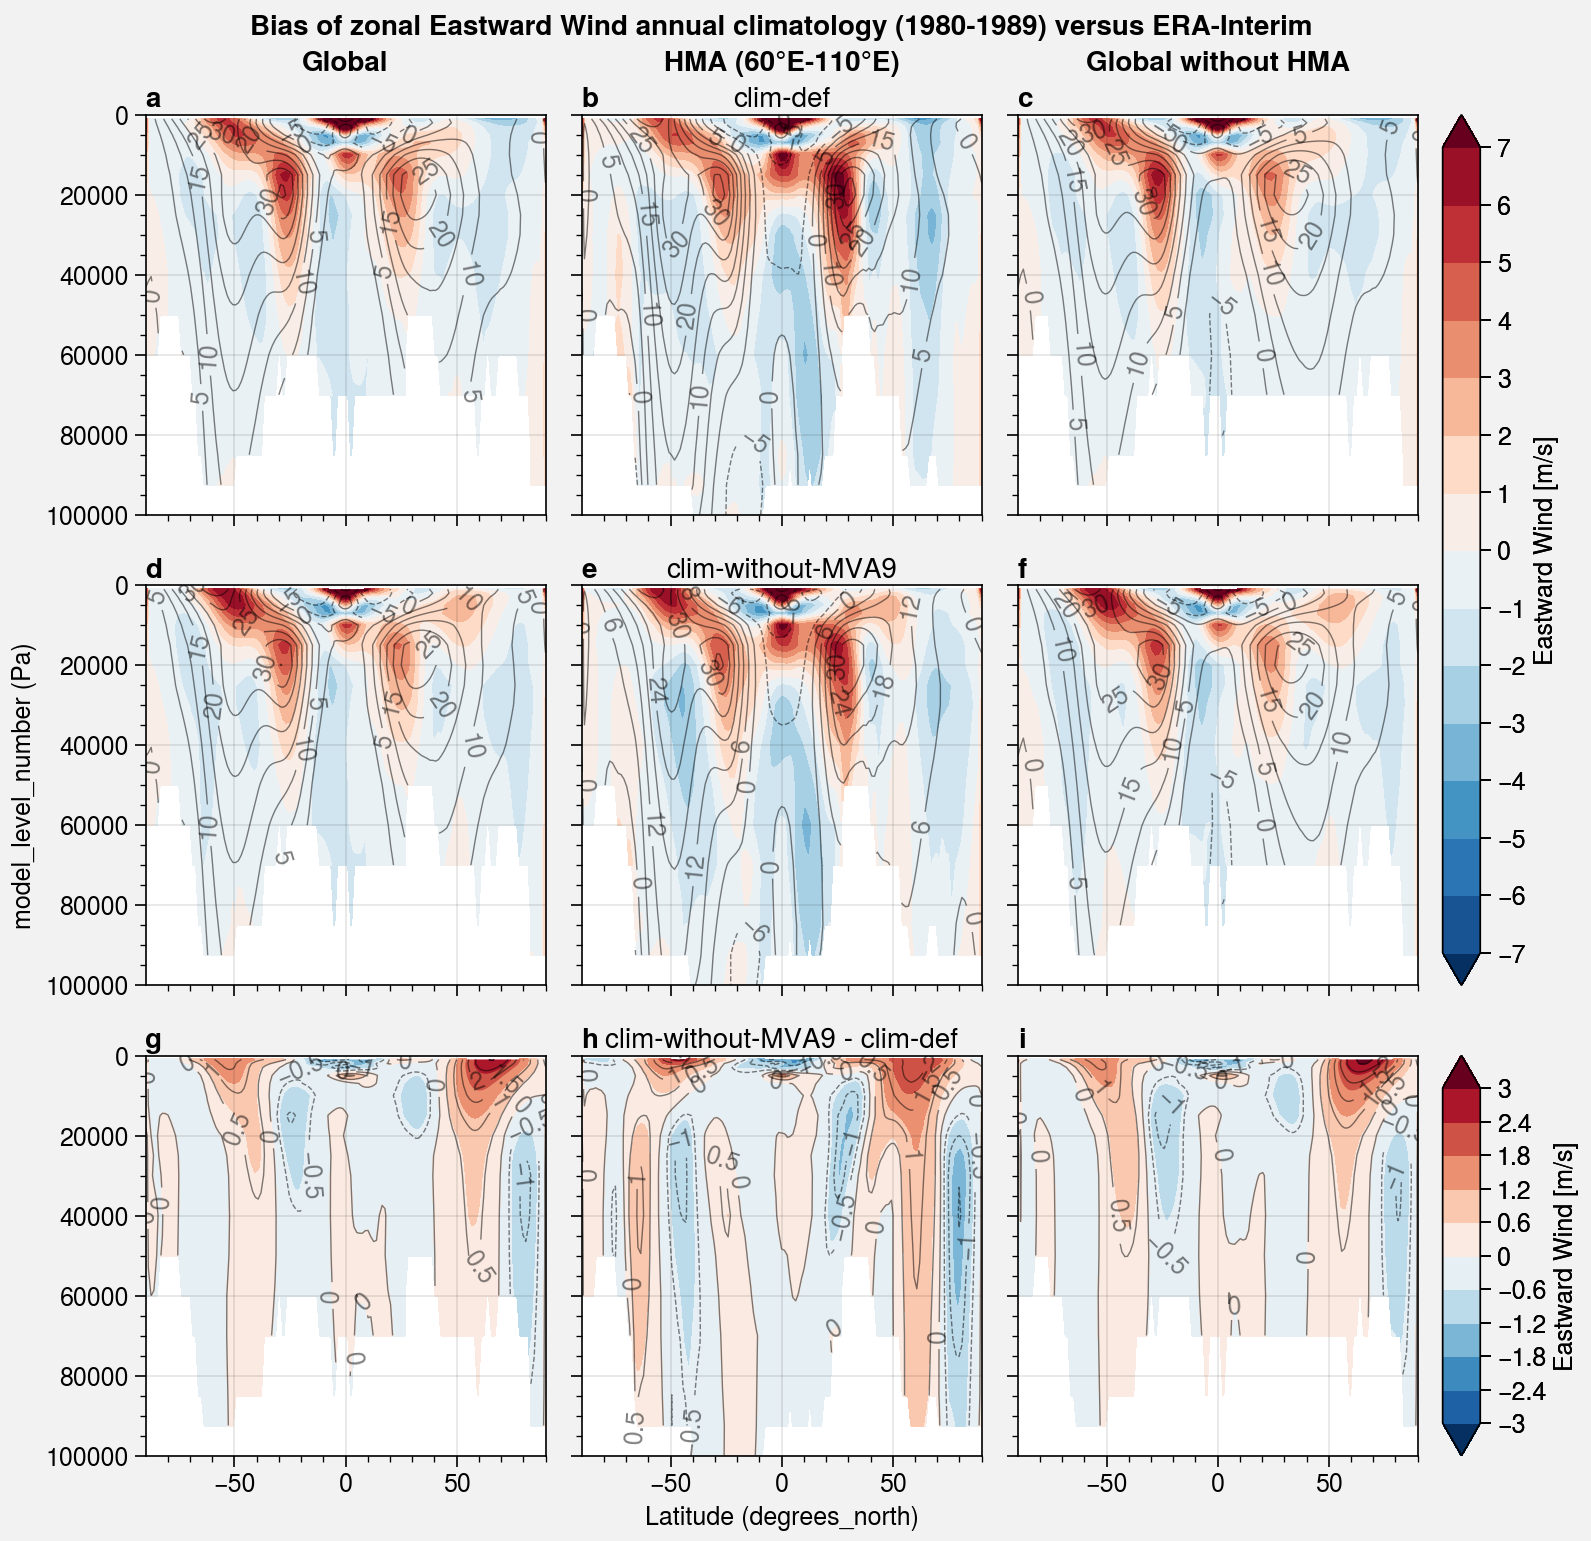

In [17]:
levels = plot.arange(-7,7,1)
extend = 'both'
cmap = 'BuRd'

levels_bias = plot.arange(-3,3,0.6)
extend_bias = 'both'
cmap_bias = 'BuRd'


ncols = 3
lw = 0.5
alpha = 0.5
ylim = (100000,0)

f, axs = plot.subplots(ncols=ncols, nrows=3, axwidth=2)

list_models = [title_1, title_2, title_2+' - '+title_1]

k=0
for i in range(0,2):
    # bias_global
    axs[k].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

    # bias_HMA
    axs[k].contourf(bias_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title=list_models[i])
    k += 1

    # bias_global_without_HMA
    m1 = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

i=2
# For the differences
# bias_global
axs[k].contourf(bias_global[i], cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
axs[k].format(ylim=ylim, title='')
k += 1

# bias_HMA
axs[k].contourf(bias_HMA[i], cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
axs[k].format(ylim=ylim, title=list_models[i])
k += 1

# bias_global_without_HMA
m2 = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap_bias, levels=levels_bias, extend=extend_bias)
axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
axs[k].format(ylim=ylim, title='')
k += 1
    
    
# f.colorbar(m, label=label, loc='r') 
f.colorbar(m1, label=label + ' ['+units+']', rows=(1, 2))
f.colorbar(m2, label=label + ' ['+units+']', row=3, formatter='simple')


axs.format(
    suptitle='Bias of zonal '+label+' annual climatology ('+period.start+'-'+period.stop+') versus '+obs_name,
    collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'], abc = True
)

# f.save('img/'+var+'_zonal_'+exp+'_'+period.start+'-'+period.stop+'.jpg')
# f.save('img/'+var+'_zonal_'+exp+'_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_zonal_'+exp+'_'+period.start+'-'+period.stop+'.pdf')